In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tikzplotlib

import os
import shutil

from KMeans import RESULTS_LOCATION, REDUCTIONS
from utils import EPOCHS, DEGREES

OUTPUT = "./output"

In [120]:
def heatmap(data, attribute, reduction):
    inferno = plt.cm.get_cmap('inferno').reversed()
    error = data[attribute].to_numpy().reshape((len(EPOCHS), len(DEGREES)))

    plt.yticks(ticks=np.arange(len(EPOCHS)), labels=EPOCHS[::-1])
    plt.xticks(ticks=np.arange(len(DEGREES)), labels=DEGREES)

    hm = plt.imshow(error, cmap=inferno)
    plt.colorbar(hm, cmap=inferno)

    plt.xlabel("Epoche")
    plt.ylabel("Grado del polinomio")

    tikzplotlib.save(f"{OUTPUT}/{reduction}_{attribute}.tex")
    plt.close()

def lines(data, attribute, reduction):
    for d in DEGREES:
        error = data[data["degree"] == d].sort_values("epochs")[attribute]
        plt.scatter(EPOCHS, error, marker="v")
        plt.plot(EPOCHS, error, label=f"grado {d}")

    plt.xlabel("Epoche")
    plt.ylabel(attribute.replace("_", " ").capitalize())
    plt.legend(loc="upper right")

    tikzplotlib.save(f"{OUTPUT}/epochs_{reduction}_{attribute}.tex")
    plt.close()

    for e in EPOCHS:
        error = data[data["epochs"] == e].sort_values("degree")[attribute]
        plt.scatter(DEGREES, error, marker="v")
        plt.plot(DEGREES, error, label=f"{e} epoche")

    plt.xlabel("Grado del polinomio")
    plt.ylabel(attribute.replace("_", " ").capitalize())
    plt.legend(loc="upper right")

    tikzplotlib.save(f"{OUTPUT}/degree_{reduction}_{attribute}.tex")
    plt.close()


In [121]:
if os.path.exists(OUTPUT):
    shutil.rmtree(OUTPUT)

os.mkdir(OUTPUT)

plt.rcParams['figure.figsize'] = [10, 8]

for red in REDUCTIONS:
    results = pd.read_csv(f".{RESULTS_LOCATION}/{red}-kmmkp.csv")

    heatmap(results, "test_error", red)
    heatmap(results, "training_error", red)

    lines(results, "test_error", red)
    lines(results, "training_error", red)

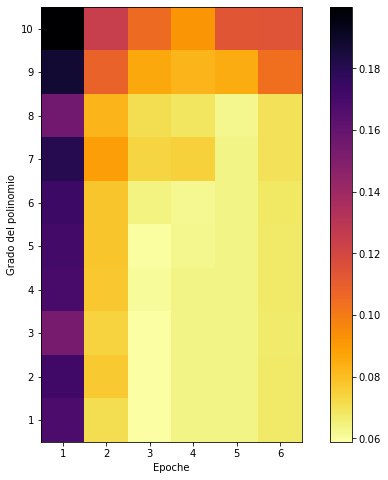

In [122]:
def f():
    data = pd.read_csv(f".{RESULTS_LOCATION}/1500-kmmkp.csv")

    inferno = plt.cm.get_cmap('inferno').reversed()
    test_error = data["test_error"].to_numpy().reshape((len(EPOCHS), len(DEGREES)))

    plt.yticks(ticks=np.arange(len(EPOCHS)), labels=EPOCHS[::-1])
    plt.xticks(ticks=np.arange(len(DEGREES)), labels=DEGREES)

    hm = plt.imshow(test_error, cmap=inferno)
    plt.colorbar(hm, cmap=inferno)

    plt.xlabel("Epoche")
    plt.ylabel("Grado del polinomio")

f()